In [7]:
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from pathlib import Path
import matplotlib as mpl
import matplotlib.font_manager as fm

# Define your font
fpath = Path(mpl.get_data_path(), "fonts/ttf/cmr10.ttf")
fontprop = fm.FontProperties(fname=fpath, size=14)

# color and syle
colors=["#888888", "#B1053A", "#6699CC", "#44AA99", "#CC6677"]
sns.set_style("whitegrid")

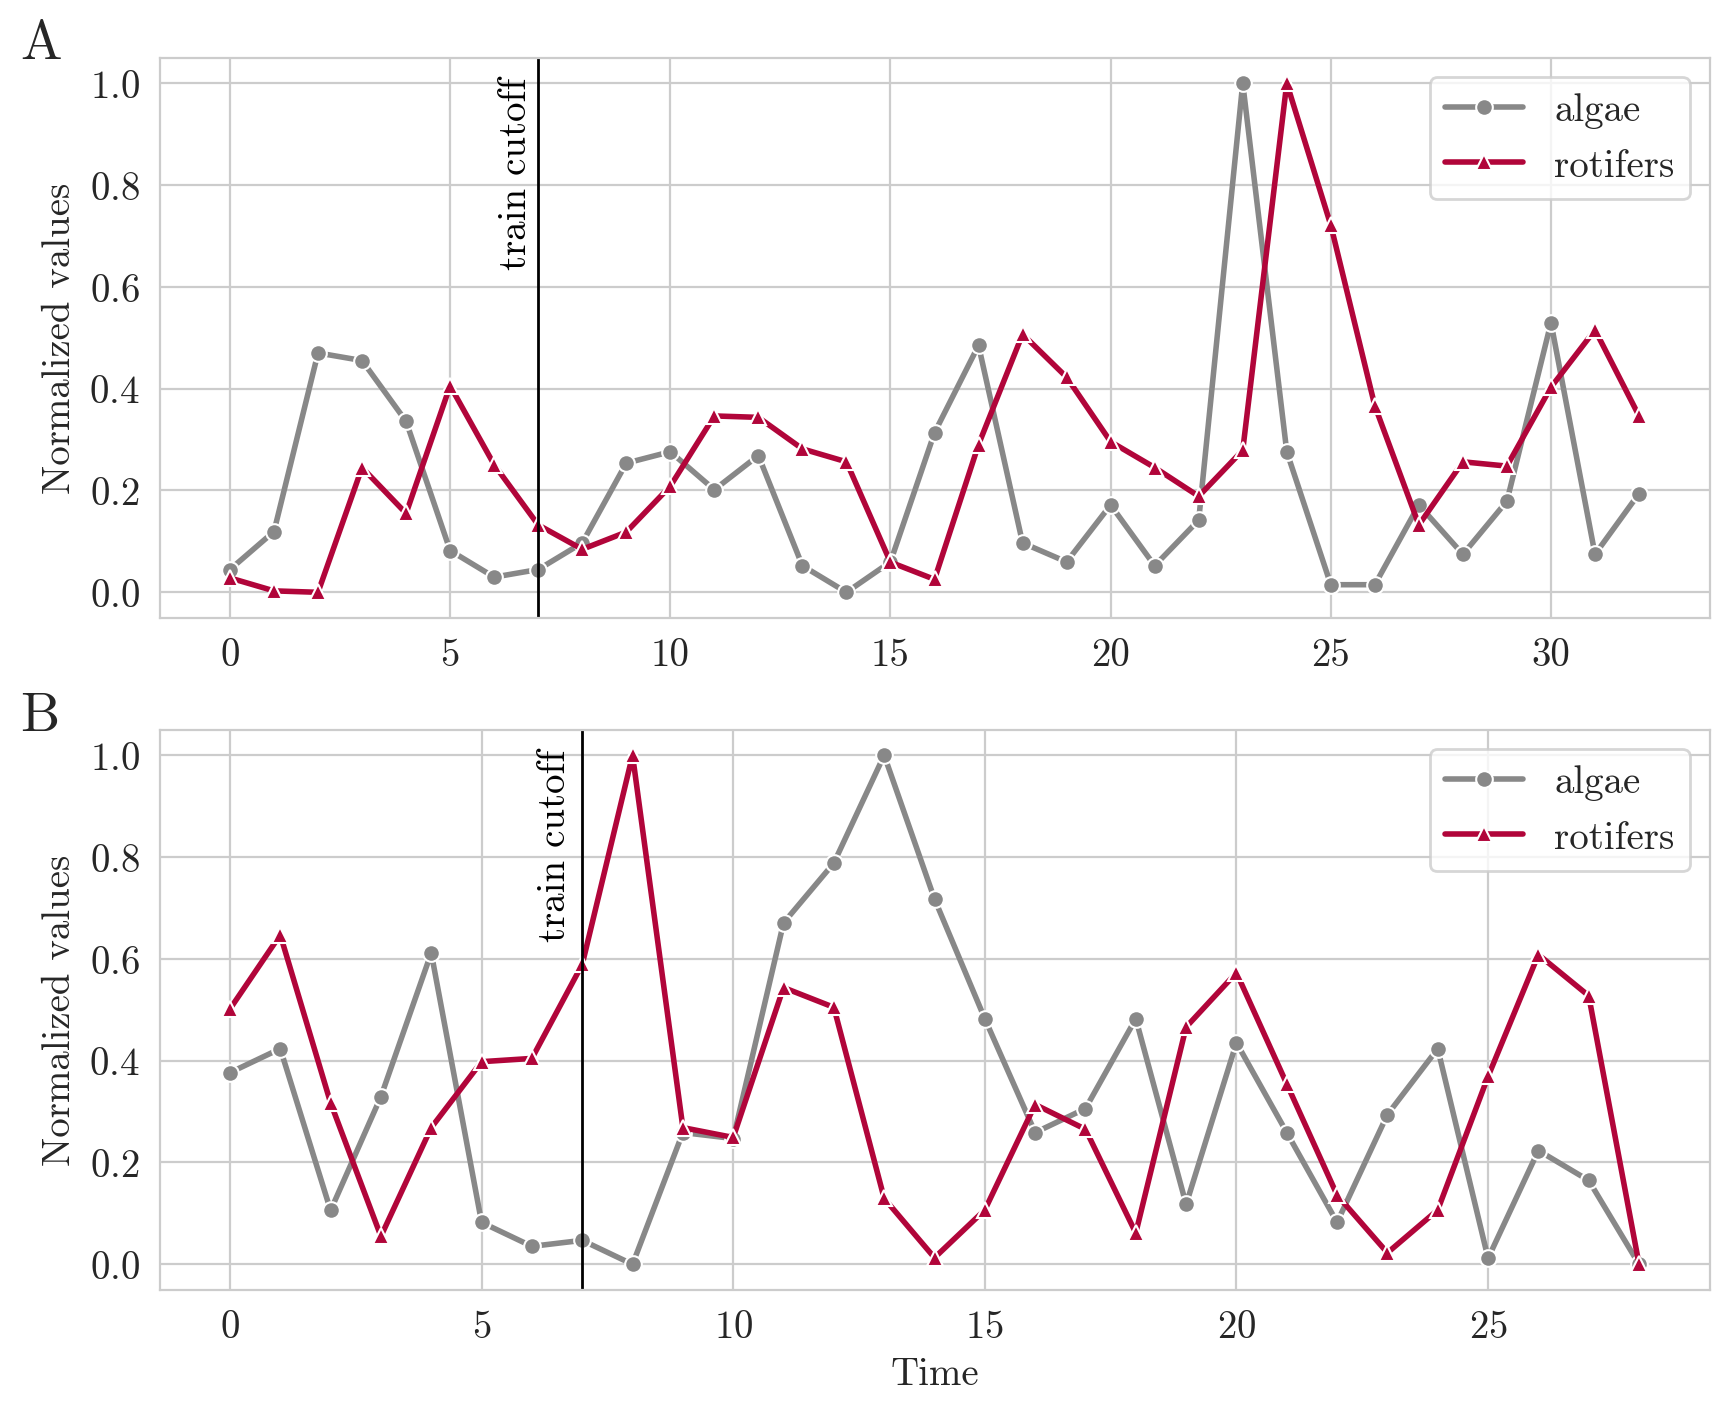

In [8]:
# make matplotlib plot with subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize=(10, 8), dpi=200, sharey=True, gridspec_kw={'hspace': 0.2})

# coherent data
df1 = pd.read_csv(os.getcwd() + "/real-world/algae-rotifers-coherent/algae-rotifers-coherent.csv").reset_index()
for column in df1.columns:
    df1[column] = (df1[column] - df1[column].min()) / (df1[column].max() - df1[column].min())
# add sns.lineplot to first subplot
sns.lineplot(x=df1.index, y='algae', data=df1, marker='o', markersize=6, color=colors[0], label='algae', linewidth=2, ax=ax[0])
sns.lineplot(x=df1.index, y='rotifers', data=df1, marker='^', markersize=6, color=colors[1], label='rotifers', linewidth=2, ax=ax[0])
# Add vertical line to show training cut-off
ax[0].axvline(x = round((1-0.78)*len(df1)), color = 'black', linestyle = '-', linewidth = '1.0')
ax[0].text(round((1-0.78)*len(df1))-0.9, 0.65, 'train cutoff', rotation=90, color = 'black', font=fpath, fontsize=14)
ax[0].legend(prop=fontprop, loc='upper right')
ax[0].set_ylabel('Normalized values', fontproperties=fontprop)
for tick in ax[0].get_xticklabels():
    tick.set_fontproperties(fontprop)
for tick in ax[0].get_yticklabels():
    tick.set_fontproperties(fontprop)

# incoherent data
df2 = pd.read_csv(os.getcwd() + "/real-world/algae-rotifers-incoherent/algae-rotifers-incoherent.csv").reset_index()
for column in df2.columns:
    df2[column] = (df2[column] - df2[column].min()) / (df2[column].max() - df2[column].min())
# add sns.lineplot to first subplot
sns.lineplot(x=df2.index, y='algae', data=df2, marker='o', markersize=6, color=colors[0], label='algae', linewidth=2, ax=ax[1])
sns.lineplot(x=df2.index, y='rotifers', data=df2, marker='^', markersize=6, color=colors[1], label='rotifers', linewidth=2, ax=ax[1])
# Add vertical line to show training cut-off
ax[1].axvline(x = round((1-0.75)*len(df2)), color = 'black', linestyle = '-', linewidth = '1.0')
ax[1].text(round((1-0.75)*len(df2))-0.9, 0.65, 'train cutoff', rotation=90, color = 'black', font=fpath, fontsize=14)
# Adding titles to subplots

# Adding labels 'A' and 'B' to the subplots
ax[0].text(-0.09, 1.0, 'A', transform=ax[0].transAxes,
             size=20, weight='bold', fontproperties=fontprop)
ax[1].text(-0.09, 1.0, 'B', transform=ax[1].transAxes,
             size=20, weight='bold', fontproperties=fontprop)

# Set plot title and labels
plt.ticklabel_format(useMathText=True)
plt.xlabel('Time', fontproperties=fontprop)
plt.ylabel('Normalized values', fontproperties=fontprop)
plt.xticks(fontproperties=fontprop)
plt.yticks(fontproperties=fontprop)
plt.legend(prop=fontprop, loc='upper right')
plt.show()